# Classifying Data using K-Nearest Neighbor

# Concept Session

### Generate the Data

In [3]:
# Import required Python Library
import numpy as np
import matplotlib.pyplot as plt


In [4]:
sweet_chrunchy = np.array([[10,9],[1, 4], [10, 1], [7, 10], [3, 10], [1, 1], [8, 5], [3, 7], [3, 6], [7, 3]])
sweet_chrunchy

array([[10,  9],
       [ 1,  4],
       [10,  1],
       [ 7, 10],
       [ 3, 10],
       [ 1,  1],
       [ 8,  5],
       [ 3,  7],
       [ 3,  6],
       [ 7,  3]])

In [7]:
len(sweet_chrunchy)

10

In [15]:
ingredients = ["Apple", "Bacon", "Banana", "Carrot", "Celery", "Cheese", "Grape", "Green Bean", "Nuts", "Orange"]
FoodType=["fruit", "protein", "fruit", "vegetable", "vegetable", "protein", "fruit", "vegetable", "protein", "fruit"]

In [17]:
# tomato data set
test =[6, 4]

## Demo - 5.1: Euclidean Distance Using Python

### Euclidean Distance Using Formula

In [25]:
def Euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2))

for i in range(len(sweet_chrunchy)):
    distance=Euclidean_distance(test,sweet_chrunchy[i])
    print("test data set",test,"and",sweet_chrunchy[i],"(",ingredients[i],") =",distance)



test data set [6, 4] and [10  9] ( Apple ) = 6.4031242374328485
test data set [6, 4] and [1 4] ( Bacon ) = 5.0
test data set [6, 4] and [10  1] ( Banana ) = 5.0
test data set [6, 4] and [ 7 10] ( Carrot ) = 6.082762530298219
test data set [6, 4] and [ 3 10] ( Celery ) = 6.708203932499369
test data set [6, 4] and [1 1] ( Cheese ) = 5.830951894845301
test data set [6, 4] and [8 5] ( Grape ) = 2.23606797749979
test data set [6, 4] and [3 7] ( Green Bean ) = 4.242640687119285
test data set [6, 4] and [3 6] ( Nuts ) = 3.605551275463989
test data set [6, 4] and [7 3] ( Orange ) = 1.4142135623730951


### Euclidean Distance Using NumPy Library

In [13]:
for i in range(len(sweet_chrunchy)):
    distance=np.linalg.norm(test-sweet_chrunchy[i])
    print("test data set",test,"and",sweet_chrunchy[i],"(",ingredients[i],") =",distance)


test data set [6, 4] and [10  9] ( Apple ) = 6.4031242374328485
test data set [6, 4] and [1 4] ( Bacon ) = 5.0
test data set [6, 4] and [10  1] ( Banana ) = 5.0
test data set [6, 4] and [ 7 10] ( Carrot ) = 6.082762530298219
test data set [6, 4] and [ 3 10] ( Celery ) = 6.708203932499369
test data set [6, 4] and [1 1] ( Cheese ) = 5.830951894845301
test data set [6, 4] and [8 5] ( Grape ) = 2.23606797749979
test data set [6, 4] and [3 7] ( Green Bean ) = 4.242640687119285
test data set [6, 4] and [3 6] ( Nuts ) = 3.605551275463989
test data set [6, 4] and [7 3] ( Orange ) = 1.4142135623730951


In [14]:
# linalg is a linear algebra model in numpy library and norm is a vector which calculates the magnitude and direction.


### Euclidean Distance Using Scipy Library

In [16]:
from scipy.spatial import distance
for i in range(len(sweet_chrunchy)):
    dis=distance.euclidean(test,sweet_chrunchy[i])
    print("test data set",test,"and",sweet_chrunchy[i],"(",ingredients[i],") =",dis)

test data set [6, 4] and [10  9] ( Apple ) = 6.4031242374328485
test data set [6, 4] and [1 4] ( Bacon ) = 5.0
test data set [6, 4] and [10  1] ( Banana ) = 5.0
test data set [6, 4] and [ 7 10] ( Carrot ) = 6.082762530298219
test data set [6, 4] and [ 3 10] ( Celery ) = 6.708203932499369
test data set [6, 4] and [1 1] ( Cheese ) = 5.830951894845301
test data set [6, 4] and [8 5] ( Grape ) = 2.23606797749979
test data set [6, 4] and [3 7] ( Green Bean ) = 4.242640687119285
test data set [6, 4] and [3 6] ( Nuts ) = 3.605551275463989
test data set [6, 4] and [7 3] ( Orange ) = 1.4142135623730951


## Demo - 5.2: Manhattan Distance Using Python

### Mahattan Distance Using Formula

### Mahattan Distance using scipy library

In [20]:
from scipy.spatial.distance import cityblock
for i in range(len(sweet_chrunchy)):
    distance=cityblock(test,sweet_chrunchy[i])
    print("test data set",test,"and",sweet_chrunchy[i],"(",ingredients[i],") =",distance)

test data set [6, 4] and [10  9] ( Apple ) = 9
test data set [6, 4] and [1 4] ( Bacon ) = 5
test data set [6, 4] and [10  1] ( Banana ) = 7
test data set [6, 4] and [ 7 10] ( Carrot ) = 7
test data set [6, 4] and [ 3 10] ( Celery ) = 9
test data set [6, 4] and [1 1] ( Cheese ) = 8
test data set [6, 4] and [8 5] ( Grape ) = 3
test data set [6, 4] and [3 7] ( Green Bean ) = 6
test data set [6, 4] and [3 6] ( Nuts ) = 5
test data set [6, 4] and [7 3] ( Orange ) = 2


## Demo - 5.3: Build Model Using KNN Algorithm

### Data Preprocessing

In [23]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
food_type_encode=label_encoder.fit_transform(FoodType)
print(food_type_encode)
print(label_encoder.classes_)

[0 1 0 2 2 1 0 2 1 0]
['fruit' 'protein' 'vegetable']


In [24]:
# since sweatness and chruchyness are measured in the same scale so data scaling is unnecessary

### Splitting Data

In [26]:
# Assign data into X and y variables
X=sweet_chrunchy
y=food_type_encode
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)  #shuffle is to avod biaseness
y_test

array([0, 1], dtype=int64)

### Finding Optimum K value

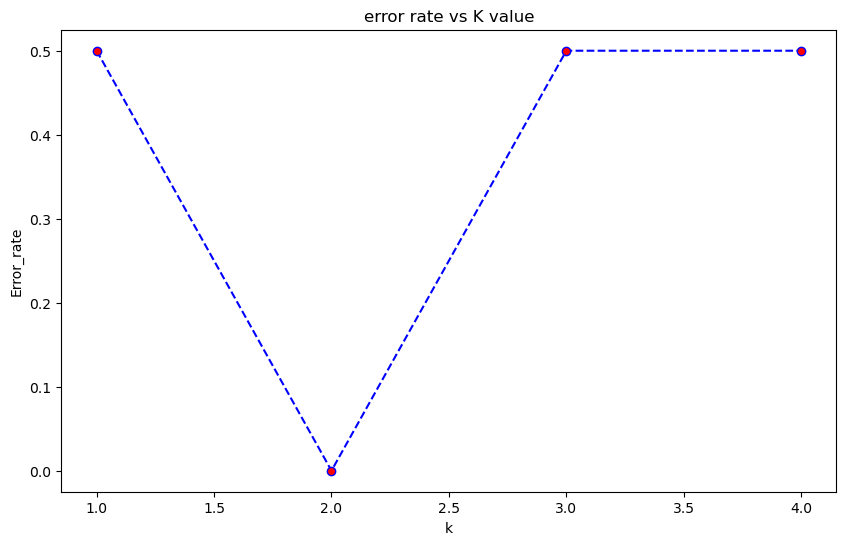

In [28]:
from sklearn import neighbors
error_rate=[]
for i in range(1,5):
    cls_food=neighbors.KNeighborsClassifier(n_neighbors =i)
    cls_food.fit(X_train,y_train)
    pred_i=cls_food.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue',ls='dashed',marker='o',markerfacecolor='red')
plt.title('error rate vs K value')
plt.xlabel('k')
plt.ylabel('Error_rate')
plt.show()


Interpretation: 
#optimum k value is derived from the above error rate plot 2 which is minimum

In [30]:
len(FoodType)

10

In [31]:
# Find K value using sqrt(n) formula
n=10
K=round(np.sqrt(10),0).astype(int)
K


3

### Building Model

In [33]:
clf=neighbors.KNeighborsClassifier(K)
clf.fit(sweet_chrunchy,food_type_encode)


print(clf.classes_)
print(clf.n_neighbors)

[0 1 2]
3


In [34]:
# Model Properties


In [35]:
# Predict the test data
test=np.reshape(test,(1,-1))
predict=clf.predict(test)
predict

array([0], dtype=int64)

### Interpretation: 

prdicted encoded test data (tomato) class from the knn model is 0 that is fruit

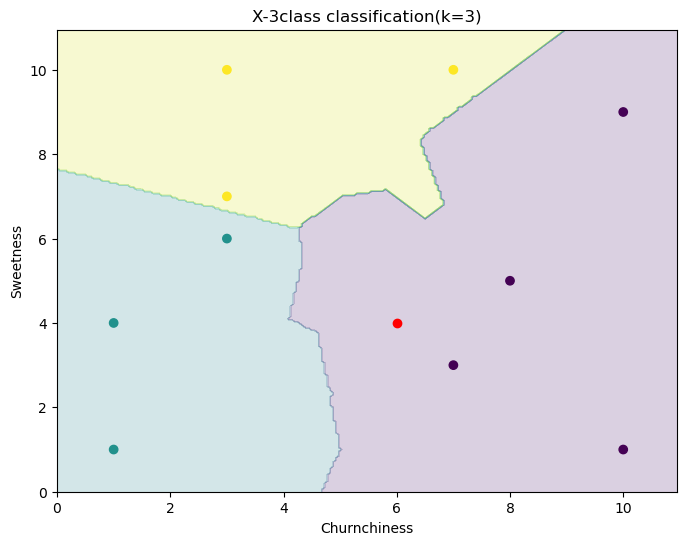

In [37]:
X=sweet_chrunchy
y=food_type_encode
# Plot the decision boundary,predict on a mesh
h=0.05
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
# Create a contour plot
plt.figure(figsize=(8,6))
plt.contourf(xx,yy,Z,alpha=0.2)
# plot also the training points
plt.scatter(x=X[:,0],y=X[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("X-3class classification(k=%i)"%(K))
plt.ylabel("Sweetness")
plt.xlabel("Churnchiness")
plt.scatter(test[:,0],test[:,1],c="red")
plt.show()

## Demo - 5.4: KNN using IRIS dataset

In [39]:
# Import required Python Libraries
import numpy as np
import pandas as pd 
from sklearn import datasets, neighbors
import matplotlib.pyplot as plt
from ipywidgets import interactive
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [40]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Find optimal value of K

In [42]:
# set range between 1 to 8
X_iris=iris.data[:,0:2]
X_iris

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [43]:
y_iris=iris.target
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
X_iris_train,X_iris_test,y_iris_train,y_iris_test=train_test_split(X_iris,y_iris,test_size=0.3,shuffle=True,random_state=0)  #shuffle is to avod biaseness
y_test

array([0, 1], dtype=int64)

Minimum error:- 0.2 at K = 4


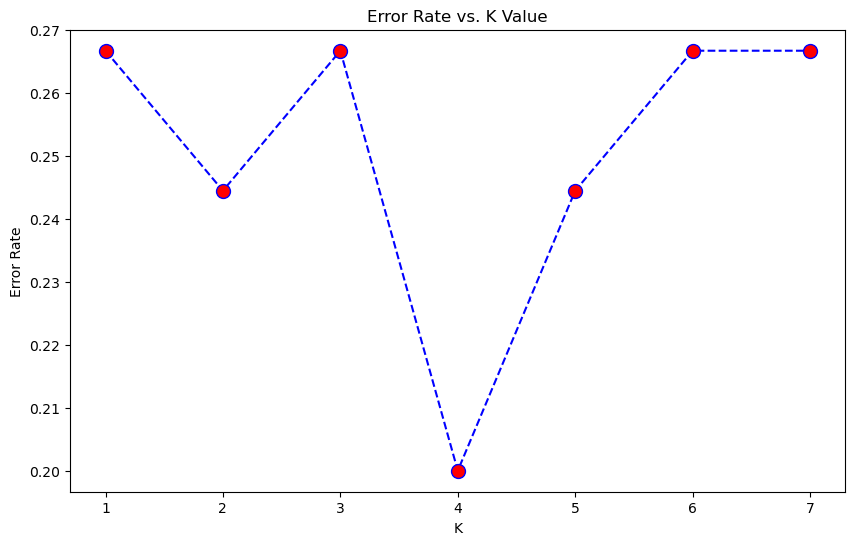

In [45]:
# Optimum K value
# set range between 1 to 8
from sklearn import neighbors
error_rate_iris = []
for i in range(1,8):
    clf_iris = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf_iris.fit(X_iris_train,y_iris_train)
    y_pred_iris =  clf_iris.predict(X_iris_test)
    error_rate_iris.append(np.mean(y_pred_iris != y_iris_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,8),error_rate_iris,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate_iris),"at K =",error_rate_iris.index(min(error_rate_iris))+1)
plt.show()

In [46]:
k=4

### Building Model

In [48]:
# learning the classifier
clf_iris = neighbors.KNeighborsClassifier(n_neighbors=k)
clf_iris.fit(X_iris_train,y_iris_train)

KNeighborsClassifier(n_neighbors=4)

In [49]:
# Model Properties
print(clf_iris.classes_)
print(clf_iris.n_neighbors)

[0 1 2]
4


### Evaluating Model Performance

In [51]:
# Using the trained model to predict the outcome of the X_Test dataset
y_pred_iris=clf_iris.predict(X_iris_test)
y_pred_iris

array([1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0])

In [52]:
# average : string, [None, ‘binary’ (default), ‘micro’, ‘macro’, ‘weighted’]
# This parameter is required for multiclass/multilabel targets. If None, the scores for each class are returned.

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


print("accuracy_score",accuracy_score(y_pred_iris,y_iris_test))
print("recall score:",recall_score(y_pred_iris,y_iris_test,average='micro'))
print("precision_score:",f1_score(y_pred_iris,y_iris_test,average='micro'))
print("precision_score:",precision_score(y_pred_iris,y_iris_test,average='micro'))


accuracy_score 0.8
recall score: 0.8
precision_score: 0.8
precision_score: 0.8


In [53]:
# ROC Score
from sklearn.metrics import roc_auc_score
y_pred_iris_prob =  clf_iris.predict_proba(X_iris_test)
roc_iris=roc_auc_score(y_iris_test,y_pred_iris_prob,multi_class='ovr',average='macro')
roc_iris

0.9019442793952598

### Interpretation:

* accuracy: 
* recall:  
* f1-score: 
* precision:  
* roc:  

Accuracy (): 


Recall (): 


Precision (): 


F1-Score (): 


ROC (): 


#### Considering All Scores Together:



In [ ]:
all scores(accuracy,recall,precision,f1_score and roc_auc) are relatively high(around 0.80) suggest that the model performnace well in both.identifying the relevant cases(recall) and making accurately postive predictions(precision).this indicates the balannced classification where the model is nither over predicting nor underpredicting the positive class

In [ ]:
a score of 0.80 on a classification model translates the 80% accuracy which indicates good performance and suggest a promising classification model